<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Rotten-Tomatoes-Dataset" data-toc-modified-id="Rotten-Tomatoes-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Rotten Tomatoes Dataset</a></span><ul class="toc-item"><li><span><a href="#Explore" data-toc-modified-id="Explore-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Exercise-Set-I" data-toc-modified-id="Exercise-Set-I-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercise Set I</a></span></li></ul></li><li><span><a href="#The-Vector-Space-Model-and-a-Search-Engine" data-toc-modified-id="The-Vector-Space-Model-and-a-Search-Engine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Vector Space Model and a Search Engine</a></span><ul class="toc-item"><li><span><a href="#In-Code" data-toc-modified-id="In-Code-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>In Code</a></span></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Multinomial-Naive-Bayes-and-Other-Likelihood-Functions" data-toc-modified-id="Multinomial-Naive-Bayes-and-Other-Likelihood-Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multinomial Naive Bayes and Other Likelihood Functions</a></span></li><li><span><a href="#Exercise-Set-II" data-toc-modified-id="Exercise-Set-II-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercise Set II</a></span></li><li><span><a href="#Picking-Hyperparameters-for-Naive-Bayes-and-Text-Maintenance" data-toc-modified-id="Picking-Hyperparameters-for-Naive-Bayes-and-Text-Maintenance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Picking Hyperparameters for Naive Bayes and Text Maintenance</a></span></li><li><span><a href="#Exercise-Set-III" data-toc-modified-id="Exercise-Set-III-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercise Set III</a></span></li><li><span><a href="#Exercise-Set-IV" data-toc-modified-id="Exercise-Set-IV-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Exercise Set IV</a></span></li><li><span><a href="#Exercise-Set-V:-Working-with-the-Best-Parameters" data-toc-modified-id="Exercise-Set-V:-Working-with-the-Best-Parameters-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Exercise Set V: Working with the Best Parameters</a></span></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpretation</a></span><ul class="toc-item"><li><span><a href="#What-are-the-strongly-predictive-features?" data-toc-modified-id="What-are-the-strongly-predictive-features?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>What are the strongly predictive features?</a></span></li><li><span><a href="#Exercise-Set-VI" data-toc-modified-id="Exercise-Set-VI-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise Set VI</a></span></li><li><span><a href="#Prediction-Errors" data-toc-modified-id="Prediction-Errors-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Prediction Errors</a></span></li><li><span><a href="#Exercise-Set-VII:-Predicting-the-Freshness-for-a-New-Review" data-toc-modified-id="Exercise-Set-VII:-Predicting-the-Freshness-for-a-New-Review-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Exercise Set VII: Predicting the Freshness for a New Review</a></span></li><li><span><a href="#Aside:-TF-IDF-Weighting-for-Term-Importance" data-toc-modified-id="Aside:-TF-IDF-Weighting-for-Term-Importance-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Aside: TF-IDF Weighting for Term Importance</a></span></li><li><span><a href="#Exercise-Set-VIII:-Enrichment-(Optional)" data-toc-modified-id="Exercise-Set-VIII:-Enrichment-(Optional)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Exercise Set VIII: Enrichment <b>(Optional)</b></a></span></li></ul></li></ul></div>

# Basic Text Classification with Naive Bayes
***
In the mini-project, you'll learn the basics of text analysis using a subset of movie reviews from the rotten tomatoes database. You'll also use a fundamental technique in Bayesian inference, called Naive Bayes. This mini-project is based on [Lab 10 of Harvard's CS109](https://github.com/cs109/2015lab10) class.  Please free to go to the original lab for additional exercises and solutions.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Rotten Tomatoes Dataset

In [2]:
critics = pd.read_csv('./critics.csv')
#let's drop rows with missing quotes
critics = critics[~critics.quote.isnull()]
critics.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
1,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
2,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
3,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
4,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
5,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


### Explore

In [3]:
n_reviews = len(critics)
n_movies = critics.rtid.unique().size
n_critics = critics.critic.unique().size


print("Number of reviews: {:d}".format(n_reviews))
print("Number of critics: {:d}".format(n_critics))
print("Number of movies:  {:d}".format(n_movies))

Number of reviews: 15561
Number of critics: 623
Number of movies:  1921


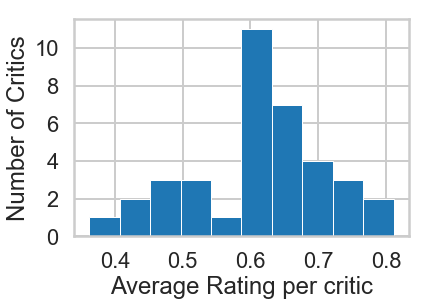

In [4]:
df = critics.copy()
df['fresh'] = df.fresh == 'fresh'
grp = df.groupby('critic')
counts = grp.critic.count()  # number of reviews by each critic
means = grp.fresh.mean()     # average freshness for each critic

means[counts > 100].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Rating per critic")
plt.ylabel("Number of Critics")
plt.yticks([0, 2, 4, 6, 8, 10]);

<div class="span5 alert alert-info">
<h3>Exercise Set I</h3>
<br/>
<b>Exercise:</b> Look at the histogram above. Tell a story about the average ratings per critic. What shape does the distribution look like? What is interesting about the distribution? What might explain these interesting things?
</div>

Firstly, it is notable that the distribution has two peaks. This indicates that the distribution may be a mixture from different populations. In our case, we can imagine that critics fall into two groups: One group has a positive attitude and tends to like most movies unless they are really bad. The other group has a negative attitude and tends to dislike all movies unless they are really good.  This negative tendency could derive either from having very specific preferences (only liking a certain *kind*  of movie), or from having a general negative outlook on the way the movie industry is going ("nowadays most movies are..."). We could interpret the latter a downwards *shift* in their distribution of movie ratings (though the shift occurs in the latent variable that measures their liking of the movie on a continuous scale, and the translation into fixed categories will result not only in the shift of mean, but also of higher-order moments of the distribution because of the fixed minimum and maximum.)

Secondly, we observe that at least three quarters of the critics fall into the group with a positive attitude. Thirdly, it is striking that only a very small fraction of critics have a mean between 55% and 60%, whereas most critics actually fall between 60% and 65%. This lack of smoothness usually only occurs by chance, due to a small sample size. We would expect a decent sample size in our case, because the original pool contained over 600 critics.  However, the authors of the plot drop critics with fewer than 100 reviews, so it is possible that they did not choose this threshold wisely, thereby dropping too many observations.

In [5]:
len(means[counts > 100])

37

Indeed, our histogram is only based on 37 observations, so it most likely contains a lot of noise. Thus, the decision to plot critics for which we have less than 100 reviews seems to be a mistake: While doing so reduces the noise in each *individual* critic's mean score, it at the same time lowers the available number of observations excessively, thus creating much more noise in the histogram overall.

Let's try lowering the threshold from 100 to 10, and see how many more observations this would give us:

In [6]:
len(means[counts > 10])

170

This increases our number of observations on which to base the histogram by more than four fold. Let's plot it again:

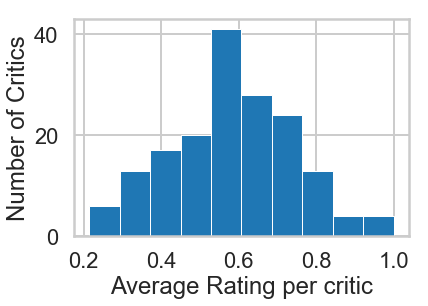

In [7]:
means[counts > 10].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Rating per critic")
plt.ylabel("Number of Critics");

This leads to a much smoother distribution.  We also see now that it is in fact only single-peaked. Thus, while it is probably still  the case that the critics vary in terms of how positive and negative their general attitude is towards movies, they seem to fall on a continuum rather than clustering into positive and negative groups.

Note that we  also have achieved a smoother histogram by increasing the binwidth. While this would have been correct in retrospect, we would not have had any way of knowing which binwidth would have given us the correct picture beforehand.

We also see that the distribution has a peak slightly above 50%, which means that most critics like about half the movies they rate. The distribution is fairly symmetric, but cannot be perfectly normal because it is censored at 0 and 1.

## The Vector Space Model and a Search Engine

All the diagrams here are snipped from [*Introduction to Information Retrieval* by Manning et. al.]( http://nlp.stanford.edu/IR-book/) which is a great resource on text processing. For additional information on text mining and natural language processing, see [*Foundations of Statistical Natural Language Processing* by Manning and Schutze](http://nlp.stanford.edu/fsnlp/).

Also check out Python packages [`nltk`](http://www.nltk.org/), [`spaCy`](https://spacy.io/), [`pattern`](http://www.clips.ua.ac.be/pattern), and their associated resources. Also see [`word2vec`](https://en.wikipedia.org/wiki/Word2vec).

Let us define the vector derived from document $d$ by $\bar V(d)$. What does this mean? Each document is treated as a vector containing information about the words contained in it. Each vector has the same length and each entry "slot" in the vector contains some kind of data about the words that appear in the document such as presence/absence (1/0), count (an integer) or some other statistic. Each vector has the same length because each document shared the same vocabulary across the full collection of documents -- this collection is called a *corpus*.

To define the vocabulary, we take a union of all words we have seen in all documents. We then just associate an array index with them. So "hello" may be at index 5 and "world" at index 99.

Suppose we have the following corpus:

`A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.`

Suppose we treat each sentence as a document $d$. The vocabulary (often called the *lexicon*) is the following:

$V = \left\{\right.$ `a, along, and, as, at, beautiful, branches, bunch, burst, day, fox, fox's, from, gazed, grapes, hanging, he, juice, longingly, mouth, of, one, ready, ripe, seemed, spied, the, them, to, trained, tree, vine, watered, with`$\left.\right\}$

Then the document

`A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree`

may be represented as the following sparse vector of word counts:

$$\bar V(d) = \left( 4,1,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,2,1,0,1,0,0,1,0,0,1,1,1,0,0 \right)$$

or more succinctly as

`[(0, 4), (1, 1), (5, 1), (6, 1), (7, 1), (9, 1), (10, 1), (12, 1), (14, 1), (15, 1), (20, 2), (21, 1), (23, 1),`
`(26, 1), (29,1), (30, 1), (31, 1)]`

along with a dictionary

``
{
    0: a, 1: along, 5: beautiful, 6: branches, 7: bunch, 9: day, 10: fox, 12: from, 14: grapes, 15: hanging, 19: mouth, 20: of, 21: one, 23: ripe, 24: seemed, 25: spied, 26: the, 29:trained, 30: tree, 31: vine, 
}
``

Then, a set of documents becomes, in the usual `sklearn` style, a sparse matrix with rows being sparse arrays representing documents and columns representing the features/words in the vocabulary.

Notice that this representation loses the relative ordering of the terms in the document. That is "cat ate rat" and "rat ate cat" are the same. Thus, this representation is also known as the Bag-Of-Words representation.

Here is another example, from the book quoted above, although the matrix is transposed here so that documents are columns:

![novel terms](terms.png)

Such a matrix is also catted a Term-Document Matrix. Here, the terms being indexed could be stemmed before indexing; for instance, `jealous` and `jealousy` after stemming are the same feature. One could also make use of other "Natural Language Processing" transformations in constructing the vocabulary. We could use Lemmatization, which reduces words to lemmas: work, working, worked would all reduce to work. We could remove "stopwords" from our vocabulary, such as common words like "the". We could look for particular parts of speech, such as adjectives. This is often done in Sentiment Analysis. And so on. It all depends on our application.

From the book:
>The standard way of quantifying the similarity between two documents $d_1$ and $d_2$  is to compute the cosine similarity of their vector representations $\bar V(d_1)$ and $\bar V(d_2)$:

$$S_{12} = \frac{\bar V(d_1) \cdot \bar V(d_2)}{|\bar V(d_1)| \times |\bar V(d_2)|}$$

![Vector Space Model](vsm.png)


>There is a far more compelling reason to represent documents as vectors: we can also view a query as a vector. Consider the query q = jealous gossip. This query turns into the unit vector $\bar V(q)$ = (0, 0.707, 0.707) on the three coordinates below. 

![novel terms](terms2.png)

>The key idea now: to assign to each document d a score equal to the dot product:

$$\bar V(q) \cdot \bar V(d)$$

Then we can use this simple Vector Model as a Search engine.

### In Code

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['Hop on pop', 'Hop off pop', 'Hop Hop hop']
print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Original text is
Hop on pop
Hop off pop
Hop Hop hop

Transformed text vector is 
[[1 0 1 1]
 [1 1 0 1]
 [3 0 0 0]]

Words for each feature:
['hop', 'off', 'on', 'pop']


In [9]:
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    # import pdb; pdb.set_trace()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.fresh == 'fresh').values.astype(np.int)

    return X, y

X, y = make_xy(critics)

## Naive Bayes

From Bayes' Theorem, we have that

$$P(c \vert f) = \frac{P(c \cap f)}{P(f)}$$

where $c$ represents a *class* or category, and $f$ represents a feature vector, such as $\bar V(d)$ as above. **We are computing the probability that a document (or whatever we are classifying) belongs to category *c* given the features in the document.** $P(f)$ is really just a normalization constant, so the literature usually writes Bayes' Theorem in context of Naive Bayes as

$$P(c \vert f) \propto P(f \vert c) P(c) $$

$P(c)$ is called the *prior* and is simply the probability of seeing class $c$. But what is $P(f \vert c)$? This is the probability that we see feature set $f$ given that this document is actually in class $c$. This is called the *likelihood* and comes from the data. One of the major assumptions of the Naive Bayes model is that the features are *conditionally independent* given the class. While the presence of a particular discriminative word may uniquely identify the document as being part of class $c$ and thus violate general feature independence, conditional independence means that the presence of that term is independent of all the other words that appear *within that class*. This is a very important distinction. Recall that if two events are independent, then:

$$P(A \cap B) = P(A) \cdot P(B)$$

Thus, conditional independence implies

$$P(f \vert c)  = \prod_i P(f_i | c) $$

where $f_i$ is an individual feature (a word in this example).

To make a classification, we then choose the class $c$ such that $P(c \vert f)$ is maximal.

There is a small caveat when computing these probabilities. For [floating point underflow](http://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html) we change the product into a sum by going into log space. This is called the LogSumExp trick. So:

$$\log P(f \vert c)  = \sum_i \log P(f_i \vert c) $$

There is another caveat. What if we see a term that didn't exist in the training data? This means that $P(f_i \vert c) = 0$ for that term, and thus $P(f \vert c)  = \prod_i P(f_i | c) = 0$, which doesn't help us at all. Instead of using zeros, we add a small negligible value called $\alpha$ to each count. This is called Laplace Smoothing.

$$P(f_i \vert c) = \frac{N_{ic}+\alpha}{N_c + \alpha N_i}$$

where $N_{ic}$ is the number of times feature $i$ was seen in class $c$, $N_c$ is the number of times class $c$ was seen and $N_i$ is the number of times feature $i$ was seen globally. $\alpha$ is sometimes called a regularization parameter.

### Multinomial Naive Bayes and Other Likelihood Functions

Since we are modeling word counts, we are using variation of Naive Bayes called Multinomial Naive Bayes. This is because the likelihood function actually takes the form of the multinomial distribution.

$$P(f \vert c) = \frac{\left( \sum_i f_i \right)!}{\prod_i f_i!} \prod_{f_i} P(f_i \vert c)^{f_i} \propto \prod_{i} P(f_i \vert c)$$

where the nasty term out front is absorbed as a normalization constant such that probabilities sum to 1.

There are many other variations of Naive Bayes, all which depend on what type of value $f_i$ takes. If $f_i$ is continuous, we may be able to use *Gaussian Naive Bayes*. First compute the mean and variance for each class $c$. Then the likelihood, $P(f \vert c)$ is given as follows

$$P(f_i = v \vert c) = \frac{1}{\sqrt{2\pi \sigma^2_c}} e^{- \frac{\left( v - \mu_c \right)^2}{2 \sigma^2_c}}$$

<div class="span5 alert alert-info">
<h3>Exercise Set II</h3>

<p><b>Exercise:</b> Implement a simple Naive Bayes classifier:</p>

<ol>
<li> split the data set into a training and test set
<li> Use `scikit-learn`'s `MultinomialNB()` classifier with default parameters.
<li> train the classifier over the training set and test on the test set
<li> print the accuracy scores for both the training and the test sets
</ol>

What do you notice? Is this a good classifier? If not, why not?
</div>

In [10]:
#your turn
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Train Naïve Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() \
        .fit(X_train, y_train)

# Evaluate accuracy
print('Accuracy on training set: {}'
      .format(nb.score(X_train, y_train)))
print('Accuracy on test set: {}'
      .format(nb.score(X_test, y_test)))

Accuracy on training set: 0.9187821336760925
Accuracy on test set: 0.7725666559588821


While it achieves pretty good accuracy even on the training set, it is not performing as good as it could. Since the accuracy on the training set is substantially lower than on the test set, we know that the classifier is overfitting. This means that its test accuracy could be reduced by taking steps to mitigate the overfitting, such as using regularization.

### Picking Hyperparameters for Naive Bayes and Text Maintenance

We need to know what value to use for $\alpha$, and we also need to know which words to include in the vocabulary. As mentioned earlier, some words are obvious stopwords. Other words appear so infrequently that they serve as noise, and other words in addition to stopwords appear so frequently that they may also serve as noise.

First, let's find an appropriate value for `min_df` for the `CountVectorizer`. `min_df` can be either an integer or a float/decimal. If it is an integer, `min_df` represents the minimum number of documents a word must appear in for it to be included in the vocabulary. If it is a float, it represents the minimum *percentage* of documents a word must appear in to be included in the vocabulary. From the documentation:

>min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

<div class="span5 alert alert-info">
<h3>Exercise Set III</h3>

<p><b>Exercise:</b> Construct the cumulative distribution of document frequencies (df). The $x$-axis is a document count $x_i$ and the $y$-axis is the percentage of words that appear less than $x_i$ times. For example, at $x=5$, plot a point representing the percentage or number of words that appear in 5 or fewer documents.</p>

<p><b>Exercise:</b> Look for the point at which the curve begins climbing steeply. This may be a good value for `min_df`. If we were interested in also picking `max_df`, we would likely pick the value where the curve starts to plateau. What value did you choose?</p>
</div>

In [11]:
# Your turn
# For each word, get relative frequency
# Whether or not word occurs in a specific document
word_occurrence = X>0 
# Number of documents in which a word occurs
word_frequency = word_occurrence.sum(axis=0)
# Convert 1d matrix to Series
word_frequency = pd.Series(np.asarray(word_frequency).squeeze())
print('Max observed number of appearances: ', word_frequency.max(), 'Number of documents: ', len(word_frequency))

Max observed number of appearances:  9502 Number of documents:  22417


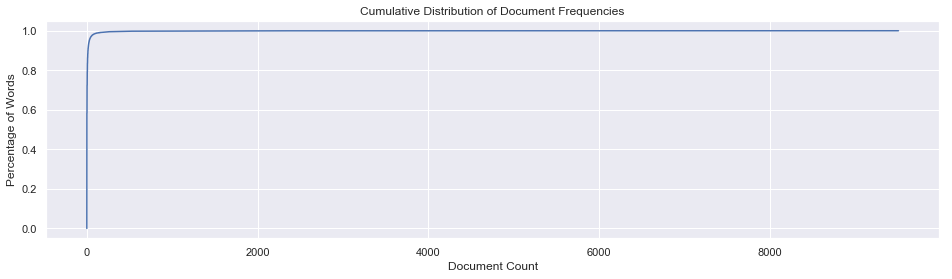

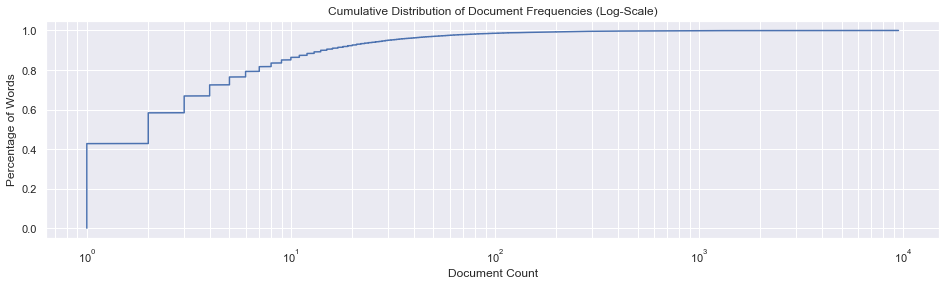

In [12]:
# Your turn.
sns.set()
plt.rcParams['figure.figsize'] = [16,4]

# Number of valid observations
n = word_frequency.notnull().sum()
# Data for x-axis
x = np.sort(word_frequency.loc[word_frequency.notnull()])
# Data for y-axis
y = np.arange(1, n+1) / n

# Plot level 
plt.plot(x, y)
plt.xlabel('Document Count')
plt.ylabel('Percentage of Words')
plt.title('Cumulative Distribution of Document Frequencies')

plt.show()
plt.close()

# Plot log
plt.plot(x, y)
plt.grid(True, which='both')  # Include minor grid
plt.xscale('log')
plt.xlabel('Document Count')
plt.ylabel('Percentage of Words')
plt.title('Cumulative Distribution of Document Frequencies (Log-Scale)')

plt.show()
plt.close()

Since the distribution is highly skewed, it is better to use a logarithmic scale in order to properly show the frequencies of words with low document counts.
We see that 40% of words only occur in one document, and about two thirds of words occur in three or less documents. 

However, I don't think this plot is helpful in helping us decide which cutoffs to use for the minimum and maximum number of occurrences a word has to have in order for us to include it in our dictionary. While the goal is no doubt to exclude words that are either too rare or too prevalent, there is no reason to think that what ultimately matters is related in any way to inflection points in the cumulative distribution (changes in rareness and prevalence).

Rather, I would expect that the determinants of the optimal thresholds are so complex that they can only be properly set empirically, i.e. through cross-validation For example, on the one hand, it is clear that setting too low of a minimum threshold leads to overfitting; on the other hand, it probably depends on the particular vocabulary of our texts up to which point rare words just add noise, and at which point they help discriminate between the particular classes we are interested in. 

**\[Instructions (cont.):\]**


The parameter $\alpha$ is chosen to be a small value that simply avoids having zeros in the probability computations. This value can sometimes be chosen arbitrarily with domain expertise, but we will use K-fold cross validation. In K-fold cross-validation, we divide the data into $K$ non-overlapping parts. We train on $K-1$ of the folds and test on the remaining fold. We then iterate, so that each fold serves as the test fold exactly once. The function `cv_score` performs the K-fold cross-validation algorithm for us, but we need to pass a function that measures the performance of the algorithm on each fold. 

In [13]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train_index, test_index in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train_index], y[train_index]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test_index], y[test_index]) # evaluate score function on held-out data
    return result / nfold # average

We use the log-likelihood as the score here in `scorefunc`. The higher the log-likelihood, the better. Indeed, what we do in `cv_score` above is to implement the cross-validation part of `GridSearchCV`.

The custom scoring function `scorefunc` allows us to use different metrics depending on the decision risk we care about (precision, accuracy, profit etc.) directly on the validation set. You will often find people using `roc_auc`, precision, recall, or `F1-score` as the scoring function.

In [14]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

We'll cross-validate over the regularization parameter $\alpha$.

Let's set up the train and test masks first, and then we can run the cross-validation procedure.

In [15]:
from sklearn.model_selection import train_test_split
_, holdout_index = train_test_split(range(critics.shape[0]), 
                                    train_size=0.7,
                                    random_state=1)
holdout_mask = np.zeros(critics.shape[0], dtype=np.bool)
holdout_mask[holdout_index] = True

C:\Users\t\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<div class="span5 alert alert-info">
<h3>Exercise Set IV</h3>

<p><b>Exercise:</b> What does using the function `log_likelihood` as the score mean? What are we trying to optimize for?</p>

<p><b>Exercise:</b> Without writing any code, what do you think would happen if you choose a value of $\alpha$ that is too high?</p>

<p><b>Exercise:</b> Using the skeleton code below, find the best values of the parameter `alpha`, and use the value of `min_df` you chose in the previous exercise set. Use the `cv_score` function above with the `log_likelihood` function for scoring.</p>
</div>

* Using log_likelihood as the score means that we choose the model that has the highest likelihood. In other words, we pick the model under which, if true, has the highest probability of generating the data we see. (Since taking the log is a monotone transformation, maximizing the log-likelihood is equivalent to maximizing the likelihood.) If we don't have any prior knowledge, the model with the highest likelihood is the model most likely to be true after seeing the data (because the maximum likelihood estimate is identical to a Bayesian maximum a posteriori estimate with flat priors).

* If we make the to pseudo-count $\alpha$ too high, it dominates the actual counts. As a result, the probability of observing different words, given a class, will become increasingly equal, and there will be no words anymore that allow us to distinguish between different classes. Thus, the estimate will simply be determined by the prior probabilities of the different classes, and thus each new document will be predicted to be of the most frequent class.

As explained above, I will use cross-validation to set not only $\alpha$, but also the cutoffs for the minimum and maximum proportion a word has to appear in the corpus in order to be included in our dictionary.

In [16]:
# your turn       
from sklearn.naive_bayes import MultinomialNB

# Define function for custom grid search
def nb_grid_search(min_dfs, max_dfs, alphas):
    """
    Performs grid search over alpha, df_min, and df_max for a Naive 
    Bayes classifier.
    """ 
    # Dictionary to save scores
    scores = {}
    # Initialize maximum score
    max_score = -np.inf

    #Find the best value for alpha, min_df, and min_df, and the best classifier
    for alpha in alphas:        
        for min_df in min_dfs:
            for max_df in max_dfs:            
                # Eliminate combinations where min would be greater than max
                if min_df >= max_df: 
                    continue                
                vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
                X, y = make_xy(critics, vectorizer)
                # The original code omitted the "~" below
                Xtrain = X[~holdout_mask]
                ytrain = y[~holdout_mask]
                nb = MultinomialNB(alpha=alpha)
                # Perform cross-validation and return score
                loglik = cv_score(nb, Xtrain, ytrain, log_likelihood)
                # Save results
                scores[(min_df, max_df, alpha)] = loglik
                # Update best alpha, if performance increased
                if loglik > max_score:                 
                    best_parameters = (min_df, max_df, alpha)
                    max_score = loglik

    print('Best Parameters:\nalpha: {}\nmin_df: {}\nmax_df: {}'
             .format(best_parameters[2], best_parameters[0],
                     best_parameters[1]))
    return(best_parameters, scores)

#the grid of parameters to search over
alphas = [1E-10, 0.1, 0.5, 1.0, 1.5, 2, 3, 5, 7, 10]
min_dfs = [0, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.01, 0.02]
max_dfs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 1.0]

best_parameters_1, scores_1 = nb_grid_search(alphas=alphas, 
                                             min_dfs=min_dfs, 
                                             max_dfs=max_dfs)

Best Parameters:
alpha: 7
min_df: 0.001
max_df: 0.05


<div class="span5 alert alert-info">
<h3>Exercise Set V: Working with the Best Parameters</h3>

<p><b>Exercise:</b> Using the best value of  `alpha` you just found, calculate the accuracy on the training and test sets. Is this classifier better? Why (not)?</p>

</div>

In [17]:
from sklearn.metrics import confusion_matrix
        
def print_accuracy(min_df=1, max_df=1.0, alpha=1,
                   conf_matrix=False):
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
    X, y = make_xy(critics, vectorizer)
    # The original code had the "~" backwards
    xtrain = X[~holdout_mask]
    ytrain = y[~holdout_mask]
    xtest = X[holdout_mask]
    ytest = y[holdout_mask]

    clf = MultinomialNB(alpha=alpha) \
            .fit(xtrain, ytrain) 

    #your turn. Print the accuracy on the test and training dataset
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)

    print("Accuracy on training data: {:2f}".format(training_accuracy))
    print("Accuracy on test data:     {:2f}".format(test_accuracy))

    if conf_matrix==True:
        print('\nConfusion Matrix:\n',
              confusion_matrix(ytest, clf.predict(xtest)))
    
print_accuracy(min_df=best_parameters_1[0],
               max_df=best_parameters_1[1],
               alpha=best_parameters_1[2])        

Accuracy on training data: 0.789111
Accuracy on test data:     0.743628


For comparison, let's print the accuracy with the default parameters. (Note that this accuracy might be slightly different from the numbers above, because the training-test split was conducted again with a different random seed.) 

In [18]:
print_accuracy()

Accuracy on training data: 0.924624
Accuracy on test data:     0.768259


While we would expect to see a decline in training accuracy and an increase in test accuracy, we actually observe a decline in *both*: We achieved a test accuracy of about 78% what the default parameters, but it declined to 74% with the "optimized" hyperparameters. (Note that the solution from CS109 also makes this mistake, and just glosses over the fact that the prediction accuracy declines.) A clue to what is wrong is the low maximum cut-off value: In the "optimal" model, all words are discarded that appear in more than 5% of documents. We would expect that threshold to be much higher (maybe around 50%).

It turns out that the root of the problem is using the likelihood in order to compare the different models: While this does make sense when comparing models that only differ in terms of alpha, it leads to wrong results when varying the cut-off thresholds. The reason is that by excluding a different amount of words, we get models with different features. 

To test this hypothesis, let's verify that the model with the default parameters has a lower log-likelihood, even though it has higher predictive accuracy:

In [19]:
print('Log-likelihood for optimal parameters: {}\n'
      'Log-likelihood for default parameters: {}'
        .format(scores_1[best_parameters_1], 
                scores_1[(0, 1.0, 1)]))

Log-likelihood for optimal parameters: -1186.115323360248
Log-likelihood for default parameters: -1321.5319623003365


Indeed, our suspicion seems correct. Thus, let's repeat the grid search with classification *accuracy* instead of log-likelihood as the objective function.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Re-define grid search function
def nb_grid_search(min_dfs, max_dfs, alphas):
    # Dictionary to save log-likelihood scores
    loglik_scores = {}
    # Dictionary to save maximum log-lik for each alpha
    max_ll = {}
    # Dictionary to save best accuracy
    max_accuracy = {}
            
    # Get different combinations of minimum and maximum cutoff values 
    for min_df in min_dfs:
        for max_df in max_dfs:            
            # Eliminate combinations where min is be greater than max
            if min_df >= max_df: 
                continue                
            # Build vocabulary
            vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
            # Build training data
            X, y = make_xy(critics, vectorizer)
            Xtrain = X[~holdout_mask]
            ytrain = y[~holdout_mask]     
            # import pdb; pdb.set_trace()

            # Initialize maximum log-likelihood for given vocabulary
            max_ll = -np.inf 
            # Find alpha with highest likelihood for given vocabulary
            for alpha in alphas:        
                nb = MultinomialNB(alpha=alpha)
                # Perform cross-validation and return score
                loglik = cv_score(nb, Xtrain, ytrain, log_likelihood)
                # Save log likelihood
                loglik_scores[(min_df, max_df, alpha)] = loglik
                # Update best alpha, if performance increased
                if loglik > max_ll:
                    max_ll = loglik
                    best_alpha = alpha
            # Accuracy of model with best alpha for giving vocabulary
            nb_optimum = MultinomialNB(alpha=best_alpha)
            max_accuracy[min_df, max_df, best_alpha] = \
                np.mean(cross_val_score(nb_optimum, Xtrain, ytrain, cv=5))

    # Find best model
    max_accuracy = pd.Series(max_accuracy)
    best_parameters = max_accuracy.idxmax()
    
    print('Best Parameters:\nalpha: {}\nmin_df: {}\nmax_df: {}'
             .format(best_parameters[2], best_parameters[0],
                     best_parameters[1]))
    return(best_parameters, max_accuracy, loglik_scores)

# Estimate model
best_parameters_2, max_accuracy, loglik_scores = \
    nb_grid_search(min_dfs=min_dfs, max_dfs=max_dfs, alphas=alphas) 

Best Parameters:
alpha: 2.0
min_df: 0.0001
max_df: 0.35


In [21]:
print_accuracy(min_df=best_parameters_2[0],
               max_df=best_parameters_2[1],
               alpha=best_parameters_2[2],
               conf_matrix=True)

Accuracy on training data: 0.888817
Accuracy on test data:     0.775969

Confusion Matrix:
 [[1117  683]
 [ 363 2506]]


In [22]:
print_accuracy()


Accuracy on training data: 0.924624
Accuracy on test data:     0.768259


This worked: The test accuracy increased slightly, compared to the model with the default parameters (from 76.8% to 77.6%). 

The reason this classifier performs better than the classifier with default values for the hyperparameters is that those values are best set empirically using cross-validation. This is because statistical theory cannot tell us which exact values are optimal, because that depends on the context.

## Interpretation

### What are the strongly predictive features?

We use a neat trick to identify strongly predictive features (i.e. words). 

* first, create a data set such that each row has exactly one feature. This is represented by the identity matrix.
* use the trained classifier to make predictions on this matrix
* sort the rows by predicted probabilities, and pick the top and bottom $K$ rows

In [24]:
# Create data with optimal vocabulary
vectorizer = CountVectorizer(min_df=best_parameters_2[0], 
                             max_df=best_parameters_2[1])
X, y = make_xy(critics, vectorizer)
xtrain = X[~holdout_mask]
ytrain = y[~holdout_mask]
xtest = X[holdout_mask]
ytest = y[holdout_mask]

# Identity matrix as predictor
x = np.eye(xtest.shape[1])
# Fit model with optimal parameters
clf = MultinomialNB(alpha=best_parameters_2[2]) \
        .fit(xtrain, ytrain)
# For each observation, get predicted prob. of *rotten*
probs = clf.predict_proba(x)[:, 1]
# Sort indices by ascending probability of rotten
# (i.e., decreasing quality)
ind = np.argsort(probs)

words = np.array(vectorizer.get_feature_names())
good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]
 
# Print probability of being fresh (1-p(rotten))
print("Good words\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(p))
    
print("\nBad words\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(p))

Good words	     P(fresh | word)
                lame 0.08
           pointless 0.09
          uninspired 0.10
      disappointment 0.10
       unfortunately 0.11
        unsatisfying 0.14
             unfunny 0.14
            tiresome 0.14
       disappointing 0.14
             witless 0.15

Bad words	     P(fresh | word)
            intimate 0.92
          delightful 0.93
           absorbing 0.93
              tender 0.93
            stunning 0.93
              superb 0.94
            hypnotic 0.94
            touching 0.95
             delight 0.95
         masterpiece 0.96


<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Why does this method work? What does the probability for each row in the identity matrix represent</p>

</div>

Each row represents a document, so getting the predictions for an identity matrix with the same dimension as our vocabulary gives us the predicted probability of freshness for documents which each contain only one word. Thus, we get the effect of each word by itself.  Now we only need to sort the results by predicted probability.  Looking at the top and bottom gives us the words most predictive of freshness and rottenness, respectively.

**\[Instructions  cont'd:\]**

The above exercise is an example of *feature selection*. There are many other feature selection methods. A list of feature selection methods available in `sklearn` is [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection). The most common feature selection technique for text mining is the chi-squared $\left( \chi^2 \right)$ [method](http://nlp.stanford.edu/IR-book/html/htmledition/feature-selectionchi2-feature-selection-1.html).

### Prediction Errors

We can see mis-predictions as well.

In [25]:
x, y = make_xy(critics, vectorizer)

prob = clf.predict_proba(x)[:, 0]
predict = clf.predict(x)

bad_rotten = np.argsort(prob[y == 0])[:5]
bad_fresh = np.argsort(prob[y == 1])[-5:]

print("Mis-predicted Rotten quotes")
print('---------------------------')
for row in bad_rotten:
    print(critics[y == 0].quote.iloc[row])
    print("")

print("Mis-predicted Fresh quotes")
print('--------------------------')
for row in bad_fresh:
    print(critics[y == 1].quote.iloc[row])
    print("")

Mis-predicted Rotten quotes
---------------------------
This pacifist spirit of brotherhood echoes the heroics in Princess Mononoke and other anime titles, but the artistic gap between the Miyazaki masterpiece and this project is huge.

If it's to be experienced at all, Return to Paradise is best seen as a lively piece of pulp, not a profound exploration of the vagaries of the human soul.

Malkovich does such wonderfully unexpected things, especially with his line readings, that he leaves us dumbfounded. No other performer is more effortlessly unnerving than this perversely gifted actor.

I'll let you in on a little secret that film critics have known for years. A major studio production, released in August with top-list stars, is almost certain to be a gobbler.

Benefits from a lively lead performance by the miscast Denzel Washington but doesn't come within light years of the book, one of the greatest American autobiographies.

Mis-predicted Fresh quotes
--------------------------
Wit

<div class="span5 alert alert-info">
<h3>Exercise Set VII: Predicting the Freshness for a New Review</h3>
<br/>
<div>
<b>Exercise:</b>
<ul>
<li> Using your best trained classifier, predict the freshness of the following sentence: *'This movie is not remarkable, touching, or superb in any way'*
<li> Is the result what you'd expect? Why (not)?
</ul>
</div>
</div>

In [26]:
#your turn
test_sentence = ['This movie is not remarkable, touching, or superb in any way']
test_words = vectorizer.transform(test_sentence)
clf.predict_proba(test_words)

array([[8.78142658e-04, 9.99121857e-01]])

Our classifier is almost certain (99.9% probability) that this movie is fresh, even though to the human eye it's clear that the review is negative.

It is not hard to see why this error occurred: We are classifying movies simply based on individual words, and all words in this review are very positive – except that they are negated with a "not". A more sophisticated classifier would take into account that words like "not" turn the meaning of the next words into the opposite. 

At the same time, it is also clear why this simple classifier is often good enough: To the human reader, the test sentence seems unnatural, because the words it negates are quite specific types of praise.  Typically, a negative review might for example say that the movie was not interesting, entertaining, etc.; but it usually would not call it not superb, touching, etc.

### Aside: TF-IDF Weighting for Term Importance

TF-IDF stands for 

`Term-Frequency X Inverse Document Frequency`.

In the standard `CountVectorizer` model above, we used just the term frequency in a document of words in our vocabulary. In TF-IDF, we weight this term frequency by the inverse of its popularity in all documents. For example, if the word "movie" showed up in all the documents, it would not have much predictive value. It could actually be considered a stopword. By weighing its counts by 1 divided by its overall frequency, we downweight it. We can then use this TF-IDF weighted features as inputs to any classifier. **TF-IDF is essentially a measure of term importance, and of how discriminative a word is in a corpus.** There are a variety of nuances involved in computing TF-IDF, mainly involving where to add the smoothing term to avoid division by 0, or log of 0 errors. The formula for TF-IDF in `scikit-learn` differs from that of most textbooks: 

$$\mbox{TF-IDF}(t, d) = \mbox{TF}(t, d)\times \mbox{IDF}(t) = n_{td} \log{\left( \frac{\vert D \vert}{\vert d : t \in d \vert} + 1 \right)}$$

where $n_{td}$ is the number of times term $t$ occurs in document $d$, $\vert D \vert$ is the number of documents, and $\vert d : t \in d \vert$ is the number of documents that contain $t$

In [27]:
# http://scikit-learn.org/dev/modules/feature_extraction.html#text-feature-extraction
# http://scikit-learn.org/dev/modules/classes.html#text-feature-extraction-ref
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=1, stop_words='english')
Xtfidf=tfidfvectorizer.fit_transform(critics.quote)

<div class="span5 alert alert-info">
<h3>Exercise Set VIII: Enrichment <b>(Optional)</b></h3>

<p>
There are several additional things we could try. Try some of these as exercises:
<ol>
<li> Build a Naive Bayes model where the features are n-grams instead of words. N-grams are phrases containing n words next to each other: a bigram contains 2 words, a trigram contains 3 words, and 6-gram contains 6 words. This is useful because "not good" and "so good" mean very different things. On the other hand, as n increases, the model does not scale well since the feature set becomes more sparse.
<li> Try a model besides Naive Bayes, one that would allow for interactions between words -- for example, a Random Forest classifier.
<li> Try adding supplemental features -- information about genre, director, cast, etc.
<li> Use word2vec or [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) to group words into topics and use those topics for prediction.
<li> Use TF-IDF weighting instead of word counts.
</ol>
</p>

<b>Exercise:</b> Try at least one of these ideas to improve the model (or any other ideas of your own). Implement here and report on the result. 
</div>

In [28]:
# Your turn